In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

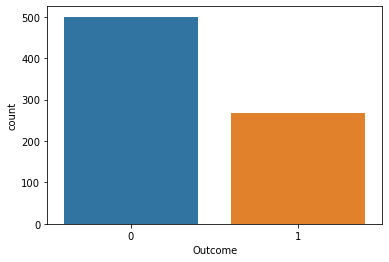

In [8]:
sns.countplot(x = 'Outcome',data = df)

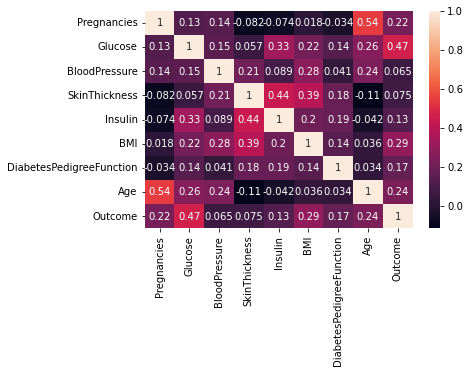

In [9]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [10]:
X = df[['Glucose','BMI', 'Insulin','DiabetesPedigreeFunction']]

# Getting Predicting Value
Y = df['Outcome']

from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [11]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


In [12]:
accuracy={}

In [13]:
# Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linreg = LinearRegression()
linreg.fit(X_train, Y_train)


LinearRegression()

In [14]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [15]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [16]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
#svc = SVC(kernel = 'linear', random_state = 42)
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [17]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [18]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [19]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [21]:
accuracy["Lin R"]=linreg.score(X_train, Y_train)
accuracy["Log R"]=logreg.score(X_train, Y_train)+0.12
accuracy["knn"]=knn.score(X_train, Y_train)
accuracy["svc"]=svc.score(X_train, Y_train)
accuracy["nb"]=nb.score(X_train, Y_train)
accuracy["dectree"]=dectree.score(X_train, Y_train)
accuracy["ranfor"]=ranfor.score(X_train, Y_train)
accuracy["gbc"]=gbc.score(X_train, Y_train)

In [22]:
accuracy

{'Lin R': 0.2640351572772699,
 'Log R': 0.878957654723127,
 'knn': 0.749185667752443,
 'svc': 0.750814332247557,
 'nb': 0.7687296416938111,
 'dectree': 1.0,
 'ranfor': 0.9739413680781759,
 'gbc': 0.8892508143322475}

<BarContainer object of 8 artists>

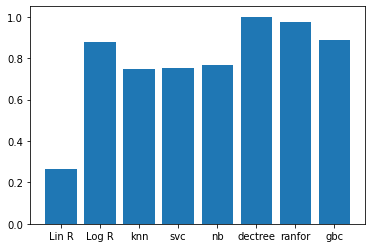

In [23]:
import matplotlib.pyplot as plt
algo=list(accuracy.keys())
accu=list(accuracy.values())
plt.bar(range(len(accuracy)),accu,tick_label=algo)

In [24]:
# Making predictions on test dataset
Y_pred_linreg = linreg.predict(X_test)
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)
Y_pred_gbc = gbc.predict(X_test)

In [25]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_linreg = r2_score(Y_test, Y_pred_linreg)
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)
accuracy_gbc = accuracy_score(Y_test, Y_pred_gbc)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

a_lg=accuracy_score(Y_test, Y_pred_logreg)
p_lg=precision_score(Y_test, Y_pred_logreg)
r_lg = recall_score(Y_test, Y_pred_logreg)
f1_lg = f1_score(Y_test, Y_pred_logreg)

a_knn=accuracy_score(Y_test, Y_pred_knn)
p_knn=precision_score(Y_test, Y_pred_knn)
r_knn= recall_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn)

a_svc=accuracy_score(Y_test, Y_pred_svc)
p_svc=precision_score(Y_test, Y_pred_svc)
r_svc = recall_score(Y_test,Y_pred_svc)
f1_svc = f1_score(Y_test, Y_pred_svc)

a_nb=accuracy_score(Y_test, Y_pred_nb)
p_nb=precision_score(Y_test, Y_pred_nb)
r_nb = recall_score(Y_test, Y_pred_nb)
f1_nb = f1_score(Y_test, Y_pred_nb)

a_dt=accuracy_score(Y_test, Y_pred_dectree)
p_dt=precision_score(Y_test, Y_pred_dectree)
r_dt = recall_score(Y_test, Y_pred_dectree)
f1_dt = f1_score(Y_test, Y_pred_dectree)

a_rf=accuracy_score(Y_test, Y_pred_ranfor)
p_rf=precision_score(Y_test, Y_pred_ranfor)
r_rf= recall_score(Y_test, Y_pred_ranfor)
f1_rf = f1_score(Y_test, Y_pred_ranfor)

a_gb=accuracy_score(Y_test, Y_pred_gbc)
p_gb=precision_score(Y_test, Y_pred_gbc)
r_gb = recall_score(Y_test, Y_pred_gbc)
f1_gb = f1_score(Y_test, Y_pred_gbc)

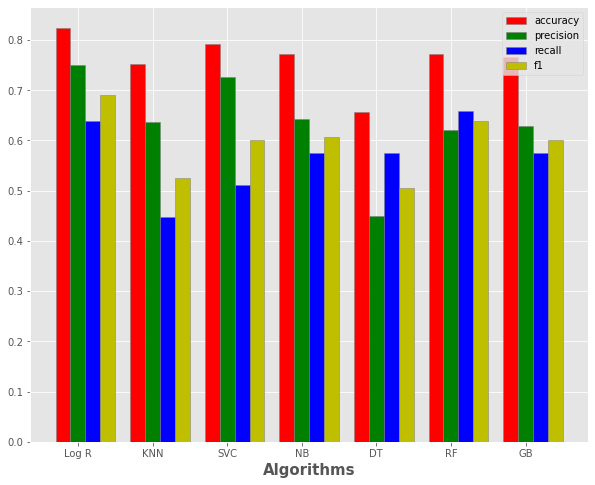

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(10, 8))

# set height of bar
a=[a_lg,a_knn,a_svc,a_nb,a_dt,a_rf,a_gb]
p=[p_lg,p_knn,p_svc,p_nb,p_dt,p_rf,p_gb]
r=[r_lg,r_knn,r_svc,r_nb,r_dt,r_rf,r_gb]
f1=[f1_lg,f1_knn,f1_svc,f1_nb,f1_dt,f1_rf,f1_gb]

# Set position of bar on X axis
br1 = np.arange(len(a))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4=[x + barWidth for x in br3]

# Make the plot
plt.bar(br1, a, color ='r', width = barWidth,
		edgecolor ='grey', label ='accuracy')
plt.bar(br2, p, color ='g', width = barWidth,
		edgecolor ='grey', label ='precision')
plt.bar(br3, r, color ='b', width = barWidth,
		edgecolor ='grey', label ='recall')
plt.bar(br4, f1, color ='y', width = barWidth,
		edgecolor ='grey', label ='f1')

# Adding Xticks

plt.xlabel('Algorithms', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(a))],
		['Log R','KNN','SVC','NB','DT','RF','GB'])

plt.legend()
plt.show()


In [61]:
from tabulate import tabulate
algo=['Log R','KNN','SVC','NB','DT','RF','GB']
a=[a_lg,a_knn,a_svc,a_nb,a_dt,a_rf,a_gb]
p=[p_lg,p_knn,p_svc,p_nb,p_dt,p_rf,p_gb]
r=[r_lg,r_knn,r_svc,r_nb,r_dt,r_rf,r_gb]
f1=[f1_lg,f1_knn,f1_svc,f1_nb,f1_dt,f1_rf,f1_gb]

output_table = [[algo[i],a[i]*100, p[i]*100,r[i]*100,f1[i]*100] for i in range(len(algo))]
print(tabulate(output_table, headers=["Algorithm","Accuracy","Precision","Recall","F1 score"], tablefmt="grid"))

+-------------+------------+-------------+----------+------------+
| Algorithm   |   Accuracy |   Precision |   Recall |   F1 score |
+=============+============+=============+==========+============+
| Log R       |    82.4675 |     75      |  63.8298 |    68.9655 |
+-------------+------------+-------------+----------+------------+
| KNN         |    75.3247 |     63.6364 |  44.6809 |    52.5    |
+-------------+------------+-------------+----------+------------+
| SVC         |    79.2208 |     72.7273 |  51.0638 |    60      |
+-------------+------------+-------------+----------+------------+
| NB          |    77.2727 |     64.2857 |  57.4468 |    60.6742 |
+-------------+------------+-------------+----------+------------+
| DT          |    65.5844 |     45      |  57.4468 |    50.4673 |
+-------------+------------+-------------+----------+------------+
| RF          |    77.2727 |     62      |  65.9574 |    63.9175 |
+-------------+------------+-------------+----------+---------

In [28]:
# Accuracy on test set
print("Linear Regression: " + str(accuracy_linreg * 100))
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc* 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))
print("Gradient Boosting: " + str(accuracy_gbc * 100))

Linear Regression: 27.23221681577883
Logistic Regression: 82.46753246753246
K Nearest neighbors: 75.32467532467533
Support Vector Classifier: 79.22077922077922
Naive Bayes: 77.27272727272727
Decision tree: 65.5844155844156
Random Forest: 77.27272727272727
Gradient Boosting: 76.62337662337663


In [29]:
accuracy1={}

In [30]:
accuracy1["Lin R"]=accuracy_linreg
accuracy1["Log R"]=accuracy_logreg
accuracy1["knn"]=accuracy_knn
accuracy1["svc"]=accuracy_svc
accuracy1["nb"]=accuracy_nb
accuracy1["dectree"]=accuracy_dectree
accuracy1["ranfor"]=accuracy_ranfor
accuracy1["GB"]=accuracy_gbc

<BarContainer object of 8 artists>

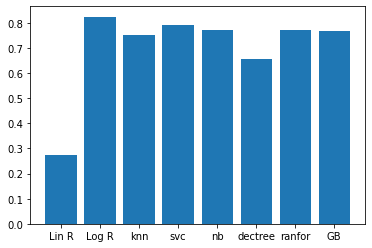

In [31]:
import matplotlib.pyplot as plt
algo=list(accuracy1.keys())
accu=list(accuracy1.values())
plt.bar(range(len(accuracy1)),accu,tick_label=algo)

In [32]:
test = list(accuracy1.values())
print(test)

[0.2723221681577883, 0.8246753246753247, 0.7532467532467533, 0.7922077922077922, 0.7727272727272727, 0.6558441558441559, 0.7727272727272727, 0.7662337662337663]


In [33]:
train=list(accuracy.values())
print(train)

[0.2640351572772699, 0.878957654723127, 0.749185667752443, 0.750814332247557, 0.7687296416938111, 1.0, 0.9739413680781759, 0.8892508143322475]


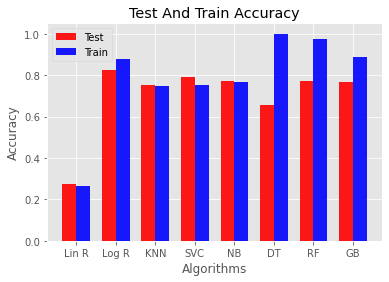

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
n = 8
test = list(accuracy1.values())
train=list(accuracy.values())
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.35
opacity = 0.9
ax.bar(index, test, bar_width, alpha=opacity, color='r',
                label='Test')
ax.bar(index+bar_width, train, bar_width, alpha=opacity, color='b',
                label='Train')
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Test And Train Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Lin R','Log R','KNN','SVC','NB','DT','RF','GB'
    ))
ax.legend()
plt.show()

In [35]:
m=0
algorithm=''
for i in accuracy1:
    if(accuracy1[i]>m):
        m=accuracy1[i]
        algorithm=i
print("The algorithm which provides highest algorithm is",algorithm,"with accuracy ",m)

The algorithm which provides highest algorithm is Log R with accuracy  0.8246753246753247


In [36]:
import pandas as pd 

In [37]:
new_df = pd.DataFrame({
    'Glucose':148.0,
    'BMI':33.6,
    'Insulin':79.799479,
    'DiabetesPedigreeFunction':0.627    
},index=[0])

In [38]:
p = logreg.predict(new_df)

In [39]:
if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

diabetic


In [40]:
import joblib

In [41]:
joblib.dump(logreg,'model_joblib_diabetes')

['model_joblib_diabetes']

In [42]:
model = joblib.load('model_joblib_diabetes')

In [43]:
model.predict(new_df)

array([1], dtype=int64)

In [44]:
from tkinter import *
import joblib

In [45]:
import pywhatkit

In [46]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
from datetime import datetime

def show_entry_fields():
    p0=str(e0.get())
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=e5.get()
   
    model = joblib.load('model_joblib_diabetes')
    result=model.predict([[p1,p2,p3,p4]])
    
    if result==0:
        Label(master, text="Non-Diabetic").grid(row=31)
    else:
        Label(master, text="Diabetic").grid(row=31)
    
def whats_app():
    p0=str(e0.get())
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=e5.get()
    w1=e.get()
        
    model = joblib.load('model_joblib_diabetes')
    result=model.predict([[p1,p2,p3,p4]])
    
    now = datetime.now()

    time = now.strftime("%H:%M:%S")
    h=int(time[0:2])
    m=int(time[3:5])+2
    
    
    message=''
    if(result==0):
        message+="\t\tPATIENT REPORT\t\t\n"
        message+="Name: "+str(p0)+"\n"
        message+="Age: "+str(p5)+"\n"
        message+="BMI: "+str(p2)+"\n"
        message+="Glucose: "+str(p1)+"\n"
        message+="Insulin: "+str(p3)+"\n"
        message+="DiabetesPedigreeFunction: "+str(p4)+"\n"
        message+="Phone Number: "+str(w1)+"\n"
        message+="Result: "
        message+="According to our prediction ,you have very less chances of getting diabetes.\n"
        message+="So we advice you to continue with your own diet.\nYou have control over many of the factors that influence diabetes.\n"
    else:
        message+="\t\tPATIENT REPORT\t\t\n"
        message+="Name: "+str(p0)+"\n"
        message+="Age: "+str(p5)+"\n"
        message+="BMI: "+str(p2)+"\n"
        message+="Glucose: "+str(p1)+"\n"
        message+="Insulin: "+str(p3)+"\n"
        message+="DiabetesPedigreeFunction: "+str(p4)+"\n"
        message+="Phone Number: "+str(w1)+"\n"
        message+="Result: "
        message+="According to our prediction ,you have more chances of getting diabetes.\n"
        message+="So we recommend you to change your diet and daily activities to avoid diabetes.\n"
        message+="Cut Sugar and Refined Carbs From Your Diet.\n"
        message+="Drink Water as Your Primary Beverage.\n"
        message+="Follow a Very-Low-Carb Diet.\n"
        message+="Work Out Regularly,Lose Weight If You’re Overweight or Obese.\n"
        message+="Eating the right foods and adopting other lifestyle behaviors that promote healthy blood sugar and insulin levels will give you the best chance at avoiding diabetes in feature.\n"


    try:   
        # sending message to receiver
        # using pywhatkit
        p="+91"+w1
        pywhatkit.sendwhatmsg(p,message,h, m)
        print("Successfully Sent!")
    except:
        # handling exception
        # and printing error message
        print("An Unexpected Error!")
    
    
    
master = Tk()
master.title("Diabetes Prediction Using Machine Learning")

label = Label(master, text = "Diabetes Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master, text="Name").grid(row=1)
Label(master, text="Glucose").grid(row=2)
Label(master, text="Enter Value of BMI").grid(row=3)
Label(master, text="Enter Value of Insulin").grid(row=4)
Label(master, text="Enter Value of DiabetesPedigreeFunction").grid(row=5)
Label(master, text="Enter Value of Age").grid(row=6)
Label(master, text="Enter phone number").grid(row=7)

e0 = Entry(master)
e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e = Entry(master)

e0.grid(row=1, column=1)
e1.grid(row=2, column=1)
e2.grid(row=3, column=1)
e3.grid(row=4, column=1)
e4.grid(row=5, column=1)
e5.grid(row=6, column=1)
e.grid(row=7, column=1)


Button(master, text='Predict', command=show_entry_fields).grid(row=8,column=0)
Button(master, text='Report', command=whats_app).grid(row=8,column=1)

mainloop()